# Supervised Machine Learning: Regression - Final Assignment

## Context

The financing of a person or group's healthcare expenses can be achieved through health insurance. In the United States, most individuals have private health insurance, which is often acquired through their current employer. On the other hand, government-sponsored programs cover a smaller percentage of the population.

The insurance company determines the premiums for their insurance policies based on two main factors: the estimated cost of claims the insurer will pay under their policies, and the expenses associated with operating specific policies or plans. Various methods are employed to calculate the cost of medical expenses, including the policyholder's health status, location, employment status, and income, which are all taken into account to arrive at the estimate.

In [85]:
# Download data
import opendatasets as od

od.download("https://www.kaggle.com/datasets/mirichoi0218/insurance")

Skipping, found downloaded files in "./insurance" (use force=True to force download)


In [86]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [87]:
# Importing the Dataset
df = pd.read_csv('insurance/insurance.csv')

## 1. About the Data

The [dataset] for this report comes from the book Machine Learning with R by Brett Lantz and is in the public domain. The dataset includes information about the insurance policy holder, their dependents, and their medical expenses throughout a year.

[dataset]: https://www.kaggle.com/mirichoi0218/insurance

* **Age**: Age of primary policyholder.
* **Sex**: Sex of the policy policyholder.
* **BMI**: Body Mass Index of policyholder, defined as the body mass divided by the square of the body height (kg/m2).
* **Smoker status**: Whether the policyholder is a smoker or a non-smoker.
* **Children**: Number of children/dependents covered in the policy.
* **Region of residence**: Residential areas of the policy holder (in the US) - North East, South East, South West, North West.
* **Charges**: Yearly medical expenses billed by the medical insurance provider ($).

## 2. Objectives


#### *Main goal:* get a regression model to predict costs.

Additional goals:
* To assess whether there is a correlation between characteristics and healthcare expenditures.
* To evaluate whether there is a noteworthy variance in healthcare costs among diverse groups.

## 3. Basic statistics and observations

In [88]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [89]:
#get the size of dataframe
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n", df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  1338
Columns  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


No actions for data cleaning needed

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### **Types of variables**

* Categorical varibles - sex,smoker,region,children
* Quantitative variables -age,bmi,charges. 

Here children is a discrete variable where as age, bmi, and charges are continous variables.


In [91]:
df.sex=df['sex'].astype("category")
df.smoker=df['smoker'].astype("category")
df.region=df['region'].astype("category")

In [92]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [93]:
#Are there more Male beneficary ?
# Are there more smoker ?
# which region has maximum , claims .?

df.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


#### Observations

* Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13.

* Average age of the primary beneficiary is 39.2 and maximum age is 64.

* Median is less than mean in charges , indicating distrubution is postively skewed.

* Customer on an average has 1 child.

* Average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770y.

* For Age, BMI, children , mean is almost equal to median , suggesting data is normally distributed.

## 4. EDA

##### Numeric parameters distribution

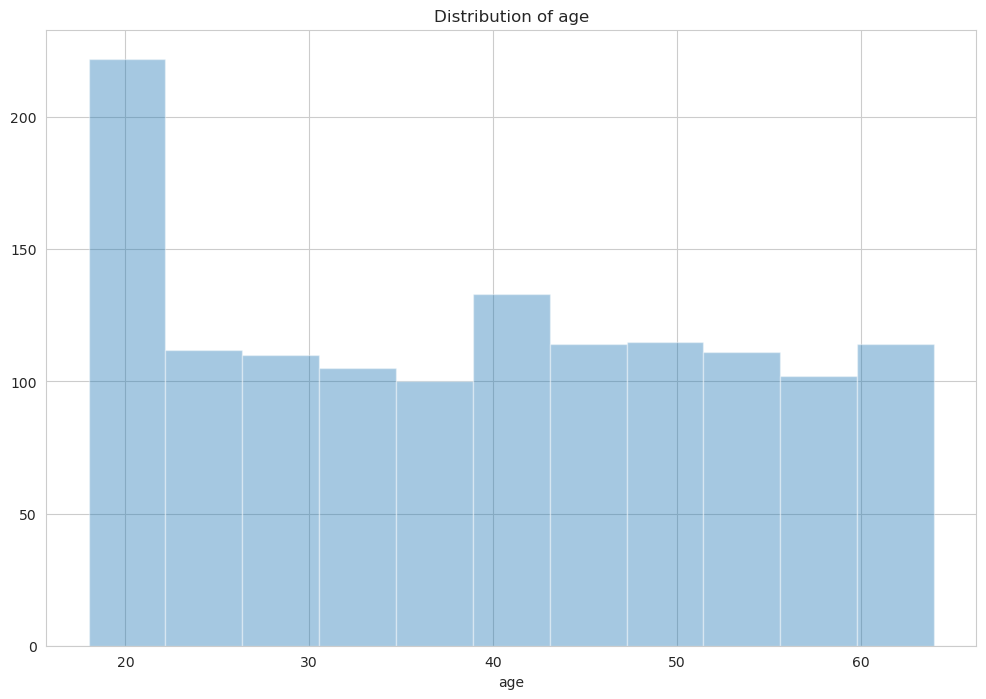

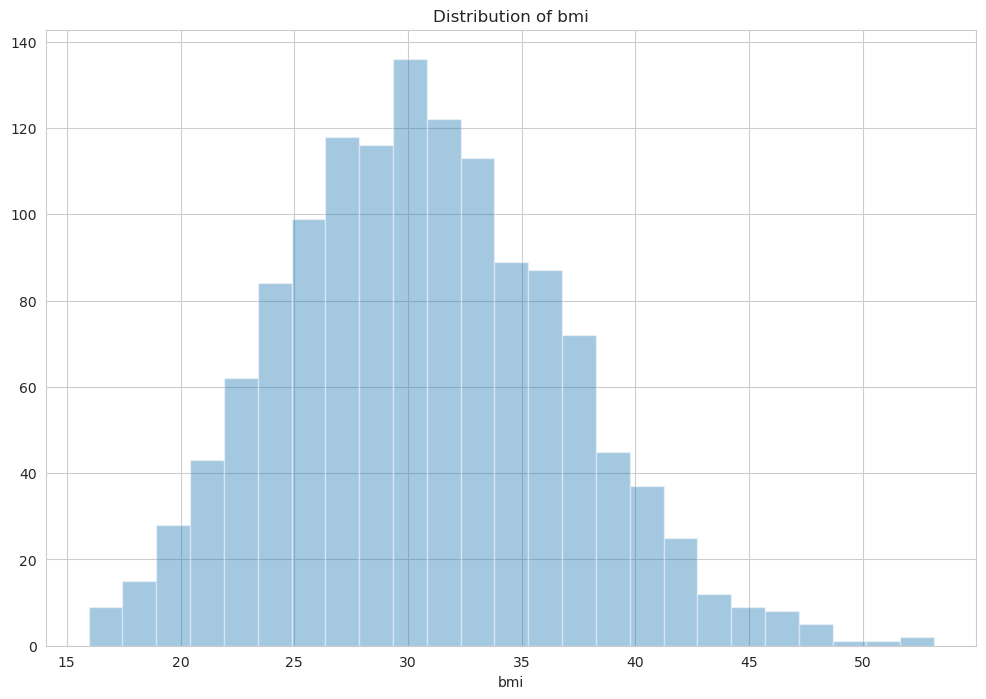

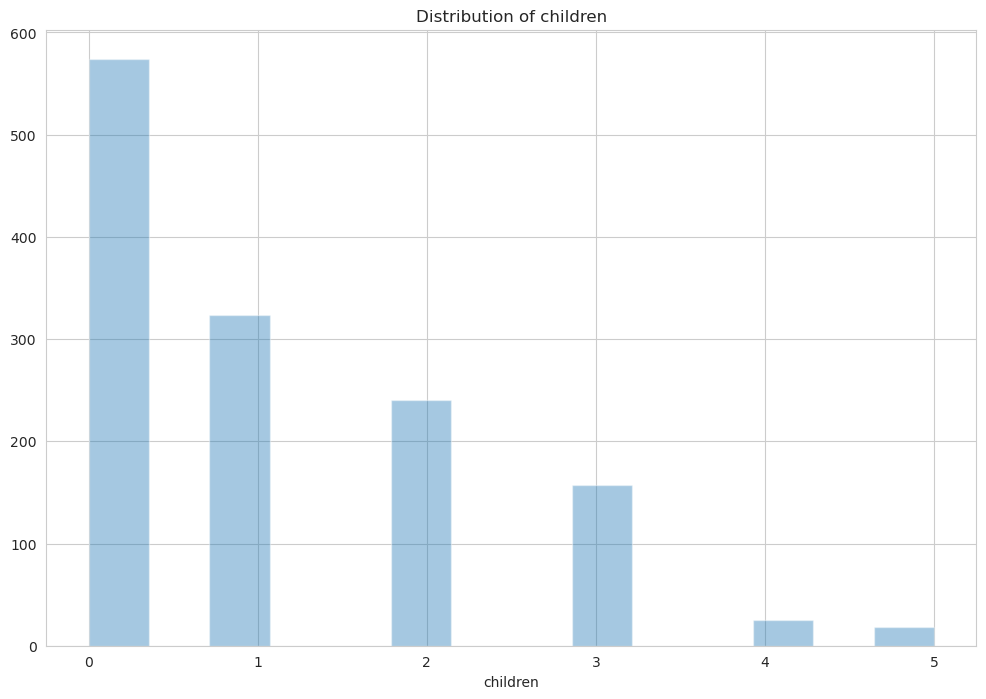

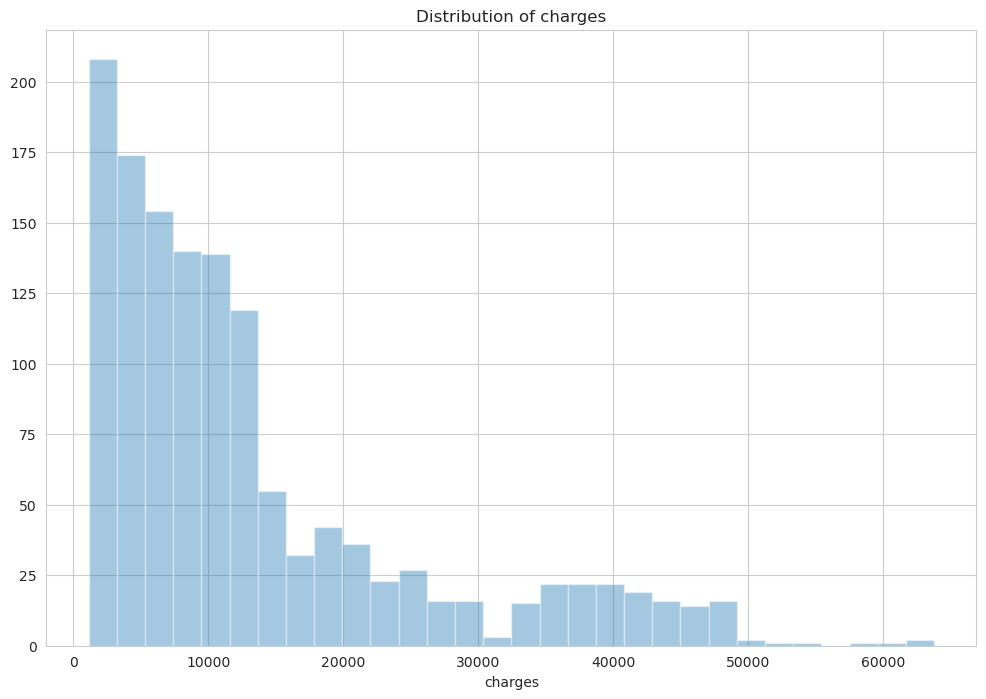

In [94]:
#select all quantitative columns for checking the spread
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    f, ax = plt.subplots(1,1, figsize=(12, 8))
    ax = sns.distplot(df[list_col[i]],kde=False)
    plt.title(f'Distribution of {list_col[i]}')


The current distribution exhibits a right-skewed pattern. In order to make it more closely resemble a normal distribution, we can utilize the natural logarithm.

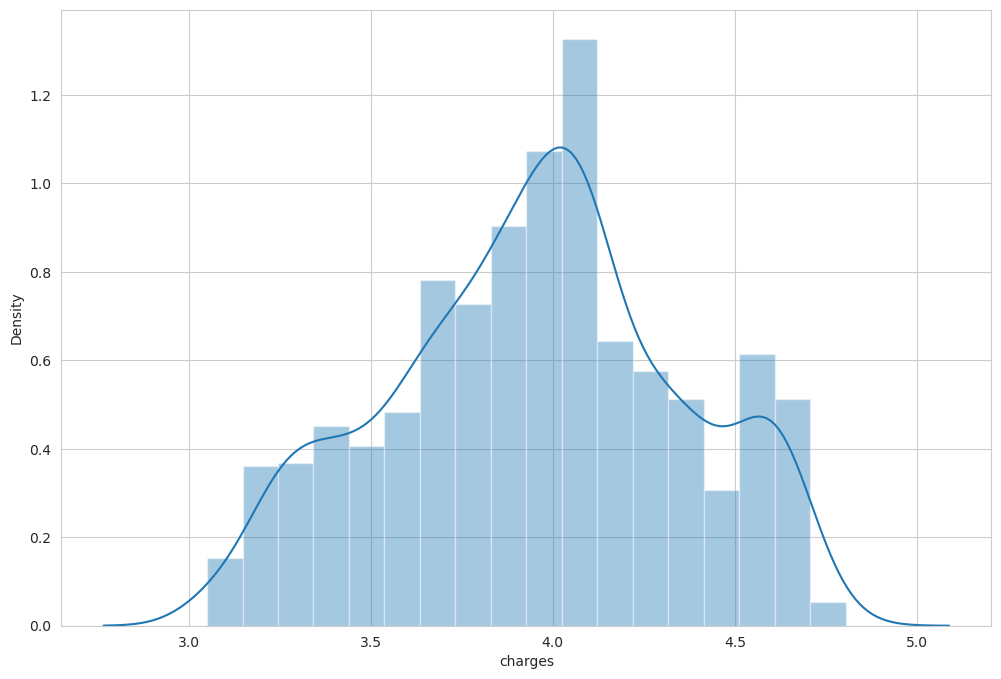

In [95]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True)

##### Categorical parameters distribution

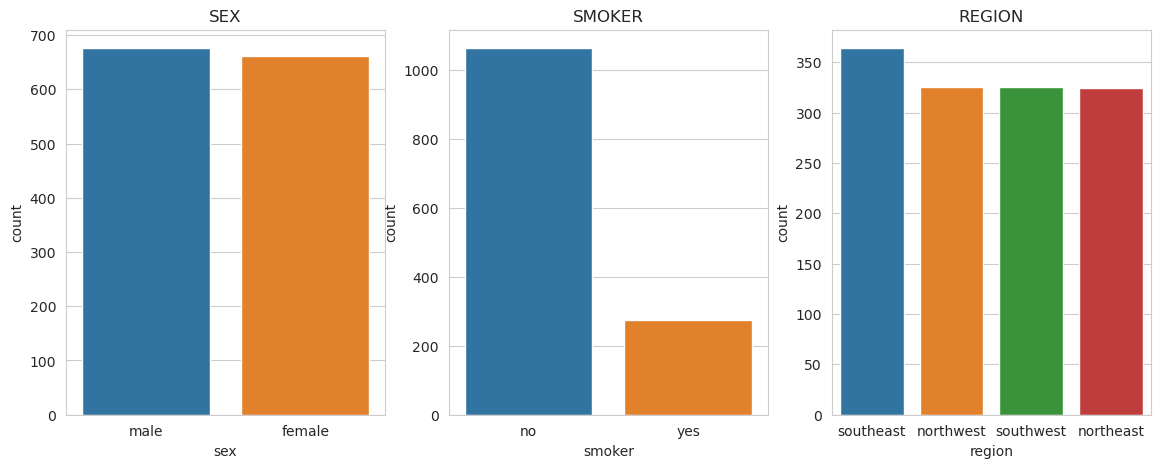

In [96]:
list_col=  df.select_dtypes(['category']).columns
fig1, axes1 =plt.subplots(1,3,figsize=(14, 5))
for i in range(len(list_col)):
    order = df[list_col[i]].value_counts(ascending=False).index
    axis=sns.countplot(x=list_col[i], data=df , order=order,ax=axes1[i]).set(title=list_col[i].upper())


#### Observations

* Roughly half of the beneficiaries (50.5%) are male, while the remaining 49.5% are female, indicating a nearly equal number of male and female beneficiaries.

* About 20.5% of the beneficiaries are smokers.

* The beneficiaries are evenly distributed among different regions, with the South East region having the largest population (~27%), and the remaining regions having roughly similar populations of around ~24% each.

* The majority of beneficiaries do not have children.

#### Bivariate & Multivariate Analysis

<AxesSubplot: >

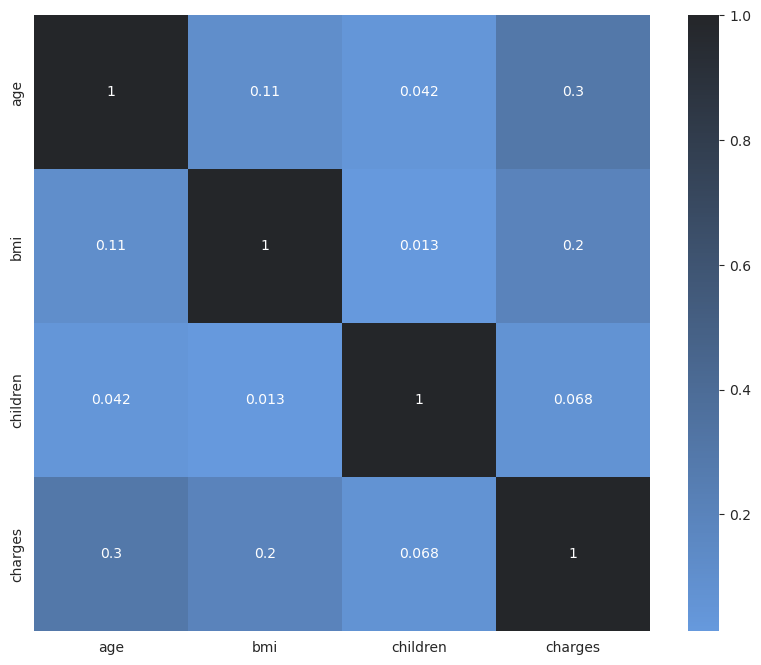

In [97]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, square=True, cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True))

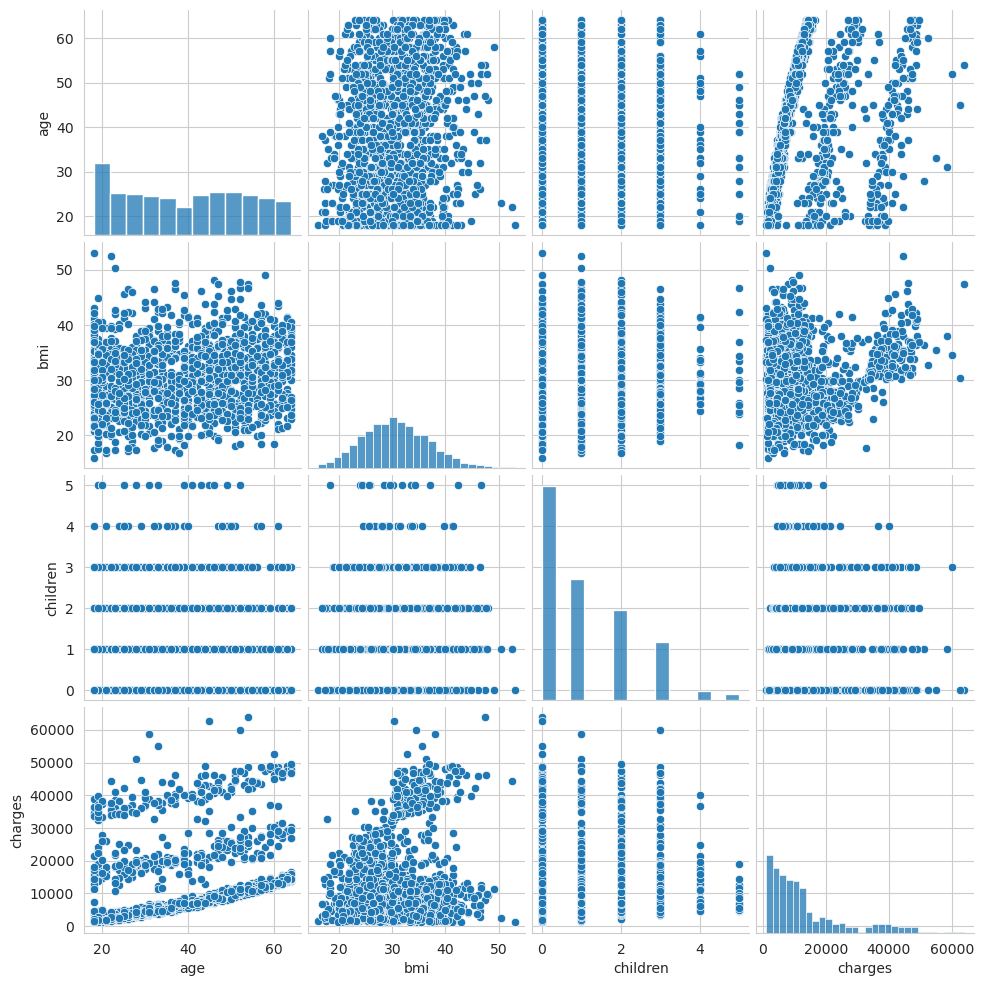

In [98]:
sns.pairplot(data=df)
plt.show()

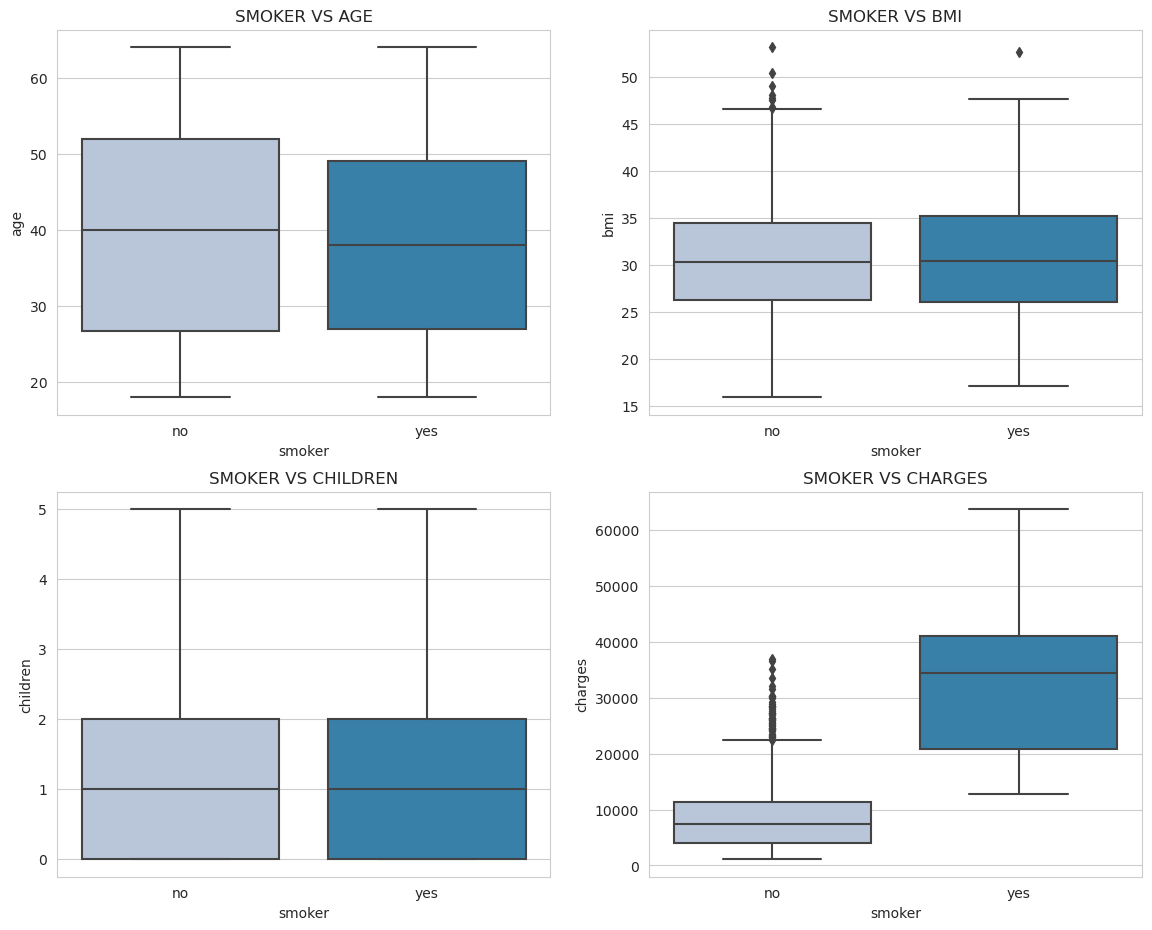

In [99]:
#smoker vs all numerical variables
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the spread
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(
        y=df[list_col[i]], x=df['smoker'], ax=ax, palette="PuBu", orient='v'
    ).set(title=f'SMOKER VS {list_col[i].upper()}')

It appears that smoking is the only variable that exhibits a strong correlation with the outcome of interest. Although the correlation with BMI was anticipated to be higher, further investigation will focus on exploring smoking in greater detail.

#### Observations

* Smoker have incured more cost to insurance than nonsmoker.

* BMI of non smoker has lot of outliers.

### Conclusion based on EDA

* Age, BMI, and smoking are important attributes that can increase insurance costs.

* As the age of the beneficiary increases, the cost to insurance increases.

* Males who smoke have the highest number of claims and bills.

* Female non-smokers have more claims than non-smoking males, which could be due to childbirth.

* Beneficiaries with 2 or 3 dependents have higher bills compared to those with 5 dependents, possibly due to an uneven number of observations in each group.

* Customers with a BMI greater than 30 have more health issues and incur higher claims.

* Females with a BMI greater than 45 have higher bills to the insurance company.

## 5. Data preprocessing

Machine learning models works much better with numbers. So we will transform categorical values to numbers.

In [103]:
from sklearn.preprocessing import LabelEncoder
# sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
# regioncolumn
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

In [104]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## 6. Prediction